В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [1482]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [1483]:
cars_df = pd.read_csv('cars.csv')

**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [1484]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [1485]:
cars_df.head(5)

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


In [1486]:
cars_df.select_dtypes(include='object').nunique()

Brand           11
Model           58
Fuel_Type        2
Transmission     2
Owner_Type       3
dtype: int64

**Висновок**

```
В наборі даних 8 числових і 5 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 3 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
```

**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [1487]:
inputs = cars_df.drop('Price', axis=1)
targets = cars_df['Price']

X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=12)

**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

In [1488]:
# Кодуємо Fuel_Type and Transmission
binary_codes = {'Diesel': 0, 'Petrol': 1, 'Manual': 0, 'Automatic': 1}

X_train['Fuel_Type_Code'] = X_train.Fuel_Type.map(binary_codes)
X_test['Fuel_Type_Code'] = X_test.Fuel_Type.map(binary_codes)

X_train['Transmission_Codes'] = X_train.Transmission.map(binary_codes)
X_test['Transmission_Codes'] = X_test.Transmission.map(binary_codes)

In [1489]:
# Кодуємо колонку Brand
hotenc = OneHotEncoder(handle_unknown='ignore')
hotenc.fit(X_train[['Brand']])

X_train[hotenc.categories_[0]] = hotenc.transform(X_train[['Brand']]).toarray()
X_test[hotenc.categories_[0]] = hotenc.transform(X_test[['Brand']]).toarray()


In [1490]:
# Кодуємо колонку Owner_Type
ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']])
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

In [1491]:
# Розділяємо модель авто на меншу к-сть груп в залежності від ціни
model_group_labels = ['Economy', 'Mid-Range', 'Premium', 'Luxury']
X_train['Model_Group'] = pd.qcut(cars_df.loc[X_train.index, 'Price'], 4, labels=model_group_labels)
X_test['Model_Group'] = pd.qcut(cars_df.loc[X_test.index, 'Price'], 4, labels=model_group_labels)

# Кодуємо Model_Group
hotenc = OneHotEncoder(handle_unknown='ignore')
hotenc.fit(X_train[['Model_Group']])

# X_train[hotenc.categories_[0]] = hotenc.transform(X_train[['Model_Group']]).toarray()
# X_test[hotenc.categories_[0]] = hotenc.transform(X_test[['Model_Group']]).toarray()

OneHotEncoder(handle_unknown='ignore')

**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

In [1492]:
X_train = X_train.select_dtypes(include='number')
X_test = X_test.select_dtypes(include='number')

Xy_train = pd.concat([X_train, y_train], axis=1)

In [1493]:
corr_matrix = Xy_train.corr()
corr_matrix[y_train.name]

Car_ID                0.025560
Year                 -0.233769
Kilometers_Driven    -0.083951
Mileage              -0.638404
Engine                0.710561
Power                 0.849137
Seats                 0.000979
Fuel_Type_Code       -0.110782
Transmission_Codes    0.680731
Audi                  0.328858
BMW                   0.477522
Ford                 -0.004592
Honda                -0.209779
Hyundai              -0.263022
Mahindra             -0.178627
Maruti               -0.249737
Mercedes              0.431606
Tata                 -0.341815
Toyota               -0.023778
Volkswagen           -0.158742
Owner_Type_Codes     -0.265537
Price                 1.000000
Name: Price, dtype: float64

**Висновок**

Найбільша кореляція відносно Price спостерігається за: Mileage, Engine, Power, Transmission_Codes.

**Завдання 6**. Тренуємо лінійну регресію.

0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [1494]:
# Model training
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

In [1495]:
# Measureing RMSEs
rmse_train = root_mean_squared_error(y_train, y_train_pred)
rmse_test = root_mean_squared_error(y_test, y_test_pred)

# Measureing R2
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(rmse_train, rmse_test)
print(r2_train, r2_test)

210293.57828151862 258181.5611203281
0.9586276808752399 0.8526086931950698


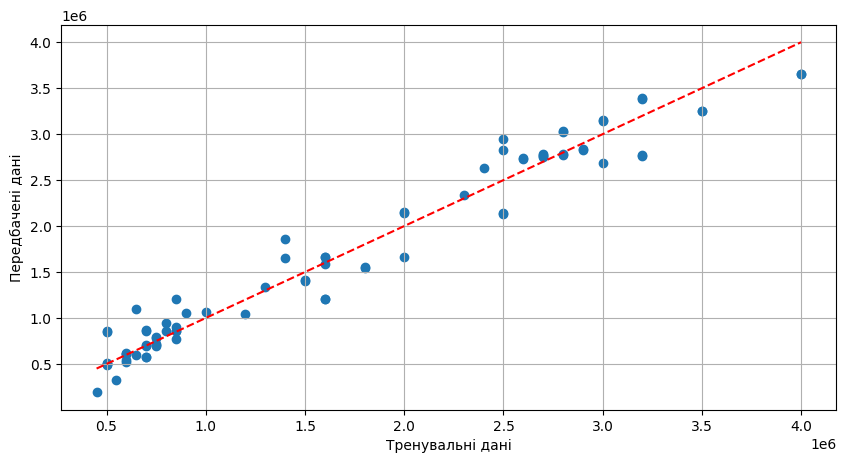

In [1496]:
plt.figure(figsize=(10, 5))
plt.scatter(y_train, y_train_pred)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--')
plt.xlabel('Тренувальні дані')
plt.ylabel('Передбачені дані')
plt.grid()
plt.show()

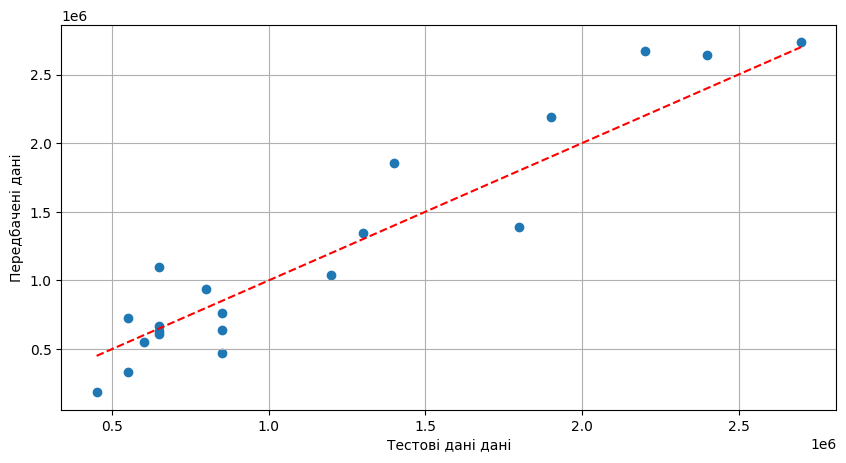

In [1497]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_test_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Тестові дані дані')
plt.ylabel('Передбачені дані')
plt.grid()
plt.show()

**Висновок**

- Для тренувальних даних: точки розташовані близько до діагоналі, що вказує на хорошу модель.
- Для тестових даних: невелика дисперсія, але прийнятна. R2 = 0.85, що досить хорошу модель.

**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

In [1498]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [1499]:
# Model training
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)

LinearRegression()

In [1500]:
coeffs = linreg.coef_
coeff_df = pd.DataFrame({
    'Feature': X_train.columns,
    'coeffs': linreg.coef_
})

coeff_df

,Feature,coeffs
0,Car_ID,5608.685421
1,Year,-8765.645714
2,Kilometers_Driven,-94398.721486
3,Mileage,-131715.512030
4,Engine,-21377.453338
5,Power,496769.214899
6,Seats,-2148.924549
7,Fuel_Type_Code,-183848.018909
8,Transmission_Codes,116693.768206
9,Audi,205600.147769


**Висновок**

- Car_ID потрібно виключити, так як це просто довільний номер
- Такі features як Year, Kilometers_Driven, Mileage, Power виглядають логічними, з точки зору впливу на ціну. Також логічним є, що Audi, BMW та Mercedes також дещо дорожчі в ціні.
- Engine, Seats та Owner_Type_Codes логічніше мали б знижувати ціну.

**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [1501]:
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train)
results = model.fit()

print(results.summary())

X_train.shape, y_train.shape

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     68.35
Date:                Wed, 08 Jan 2025   Prob (F-statistic):           2.01e-33
Time:                        16:50:55   Log-Likelihood:                -1094.0
No. Observations:                  80   AIC:                             2230.
Df Residuals:                      59   BIC:                             2280.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.594e+07   1.01

((80, 22), (80,))